# IE 360 HW1 Time series data inspection

In this project our aim inspecting various times series data from TURKIYE CUMHURIYET MERKEZ BANKASI website. We will select three independent data that span specified time intervals. Using google trends search volume and additional seasonal/trend data we are trying to explain our main data and our approach to problem.

## Questions

### 1) How much varience in House Prices can be explained by Search Volume Google trends 'Inflation' keyword and total money supply?
We are inspecting if there is a siginifacnt relation between House Prices and search Volume Google trends 'Inflation' keyword and total money supply.


### 2) How much varience in Work Participation rate can be explained by Search Volume Google trends 'Recession', 'Pandemic' and 'Hotel Prices'  keywords and Consumer Confidence Index?
We are inspecting if there is a siginifacnt relation between Work Participation rate and earch Volume Google trends 'Recession', 'Pandemic' and 'Hotel Prices'  keywords and Consumer Confidence Index.

### 3) How much varience in Central Bank reserves can be explained by Search Volume Google trends 'USD Exchange Rate', 'Swap' keywords, total International debt and Foreign investment amount?
We are inspecting if there is a siginifacnt relation between Central Bank reserves and  Search Volume Google trends 'USD Exchange Rate', 'Swap' keywords, total International debt and Foreign investment amount.

# Necessary Importings

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data manipulation

In below there are three different data from TURKIYE CUMHURIYET MERKEZ BANKASI website.

In [373]:
# read data from excel
konut_fiyatlari = pd.read_excel('konut_fiyatlari.xlsx')

# read data from excel
is_gucune_katilim_orani = pd.read_excel('is_gucune_katilim_orani.xlsx')

# read data from excel
merkez_bankasi_rezerv = pd.read_excel('merkez_bankasi_rezerv.xlsx')

In [270]:
# turn the data into a dataframe
konut_fiyatlari_df = pd.DataFrame(konut_fiyatlari)

# change column names
konut_fiyatlari_df.columns = ['YEAR-MONTH-DAY', 'House Prices']

konut_fiyatlari_df['YEAR-MONTH-DAY'] = pd.to_datetime(konut_fiyatlari_df['YEAR-MONTH-DAY']) # convert to datetime

konut_fiyatlari_df

,YEAR-MONTH-DAY,House Prices
0,2014-01-01,64.1
1,2014-02-01,64.8
2,2014-03-01,65.7
3,2014-04-01,66.8
4,2014-05-01,67.5
...,...,...
115,2023-08-01,1043.1
116,2023-09-01,1087.9
117,2023-10-01,1129.5
118,2023-11-01,1150.0


In [324]:
# turn the data into a dataframe
is_gucune_katilim_orani_df = pd.DataFrame(is_gucune_katilim_orani)

# change column names
is_gucune_katilim_orani_df.columns = ['YEAR-MONTH-DAY', 'Participation Rate']

is_gucune_katilim_orani_df['YEAR-MONTH-DAY'] = pd.to_datetime(is_gucune_katilim_orani_df['YEAR-MONTH-DAY']) # convert to datetime

is_gucune_katilim_orani_df

,YEAR-MONTH-DAY,Participation Rate
0,2014-01-01,47.8
1,2014-02-01,48.5
2,2014-03-01,49.9
3,2014-04-01,50.1
4,2014-05-01,50.5
...,...,...
115,2023-08-01,53.9
116,2023-09-01,53.9
117,2023-10-01,53.1
118,2023-11-01,53.4


In [374]:
# turn the data into a dataframe
merkez_bankasi_rezerv_df = pd.DataFrame(merkez_bankasi_rezerv)

# change column names
merkez_bankasi_rezerv_df.columns = ['YEAR-MONTH-DAY', 'Central Bank Reserves']

merkez_bankasi_rezerv_df['YEAR-MONTH-DAY'] = pd.to_datetime(merkez_bankasi_rezerv_df['YEAR-MONTH-DAY']) # convert to datetime

merkez_bankasi_rezerv_df

,YEAR-MONTH-DAY,Central Bank Reserves
0,2014-01-01,104627
1,2014-02-01,106453
2,2014-03-01,105897
3,2014-04-01,108989
4,2014-05-01,110337
...,...,...
115,2023-08-01,75955
116,2023-09-01,81574
117,2023-10-01,82411
118,2023-11-01,90997


### Correlation between selected data metrics from EVDS

Since we want to three indepent data, we should build correlation matirx. Treshold for maximum correlation is 0.5.

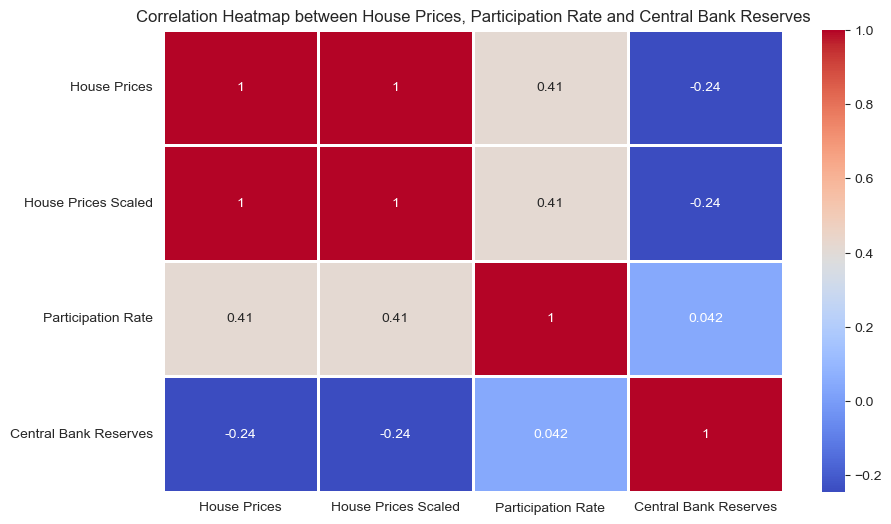

In [375]:
# correlation heatmap between House Prices, Export Unit Value and Gold Mine Production
merged_df = pd.merge(konut_fiyatlari_df, is_gucune_katilim_orani_df, on='YEAR-MONTH-DAY')
merged_df = pd.merge(merged_df, merkez_bankasi_rezerv_df, on='YEAR-MONTH-DAY')

plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap between House Prices, Participation Rate and Central Bank Reserves')
plt.show()

## Part 1 Additional Data

In first part we are focusing House Prices. For prediction we will use 'ENFLASYON' Gooogle trends serach volume and also total money supply in TL.

In [279]:
# read data from csv
google_trends_enflasyon = pd.read_csv('google_trends_ENFLASYON.csv')

# read data from excel
tuketici_guven_endeksi = pd.read_excel('tuketici_guven_endeksi.xlsx')

# read data from excel
para_arzi = pd.read_excel('para_arzi.xlsx')

In [276]:
# turn the data into a dataframe
google_trends_enflasyon_df = pd.DataFrame(google_trends_enflasyon)

# change column names
google_trends_enflasyon_df.columns = ['YEAR-MONTH-DAY', 'Search Volume Inflation']

google_trends_enflasyon_df['YEAR-MONTH-DAY'] = pd.to_datetime(google_trends_enflasyon_df['YEAR-MONTH-DAY']) # convert to datetime

google_trends_enflasyon_df

,YEAR-MONTH-DAY,Search Volume Inflation
0,2014-01-01,12
1,2014-02-01,6
2,2014-03-01,5
3,2014-04-01,6
4,2014-05-01,6
...,...,...
115,2023-08-01,36
116,2023-09-01,46
117,2023-10-01,39
118,2023-11-01,50


In [280]:
# turn the data into a dataframe
para_arzi_df = pd.DataFrame(para_arzi)

# change column names
para_arzi_df.columns = ['YEAR-MONTH-DAY', 'Money Supply']

para_arzi_df['YEAR-MONTH-DAY'] = pd.to_datetime(para_arzi_df['YEAR-MONTH-DAY']) # convert to datetime

para_arzi_df

,YEAR-MONTH-DAY,Money Supply
0,2014-01-01,2.227790e+08
1,2014-02-01,2.215548e+08
2,2014-03-01,2.295383e+08
3,2014-04-01,2.255305e+08
4,2014-05-01,2.243821e+08
...,...,...
115,2023-08-01,4.545753e+09
116,2023-09-01,4.492360e+09
117,2023-10-01,4.565791e+09
118,2023-11-01,4.631462e+09


### Data exploration and Visualization

As it can be seen, there is a simple time series data for House pricing.

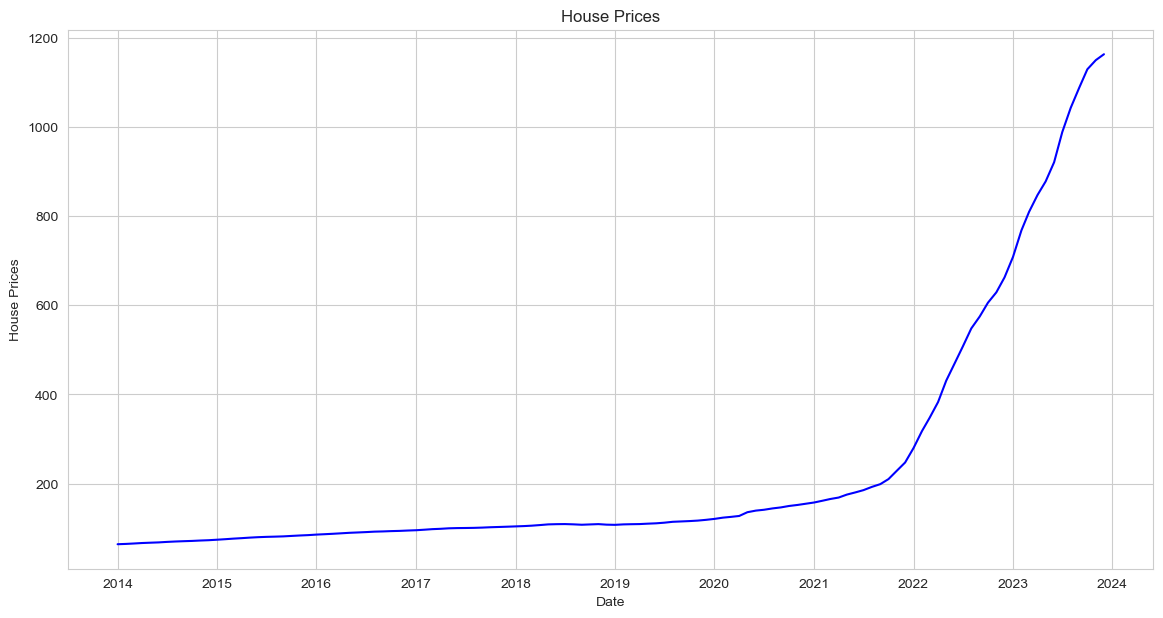

In [282]:
# Plot the time series data
plt.figure(figsize=(14, 7))

# Participation Rate plot
plt.plot(konut_fiyatlari_df['YEAR-MONTH-DAY'], konut_fiyatlari_df['House Prices'], label='House Prices', color='blue')
plt.title('House Prices')
plt.xlabel('Date')
plt.ylabel('House Prices')

plt.show()

In below we also can see 'ENFLASYON' search volume and money supply data plots.

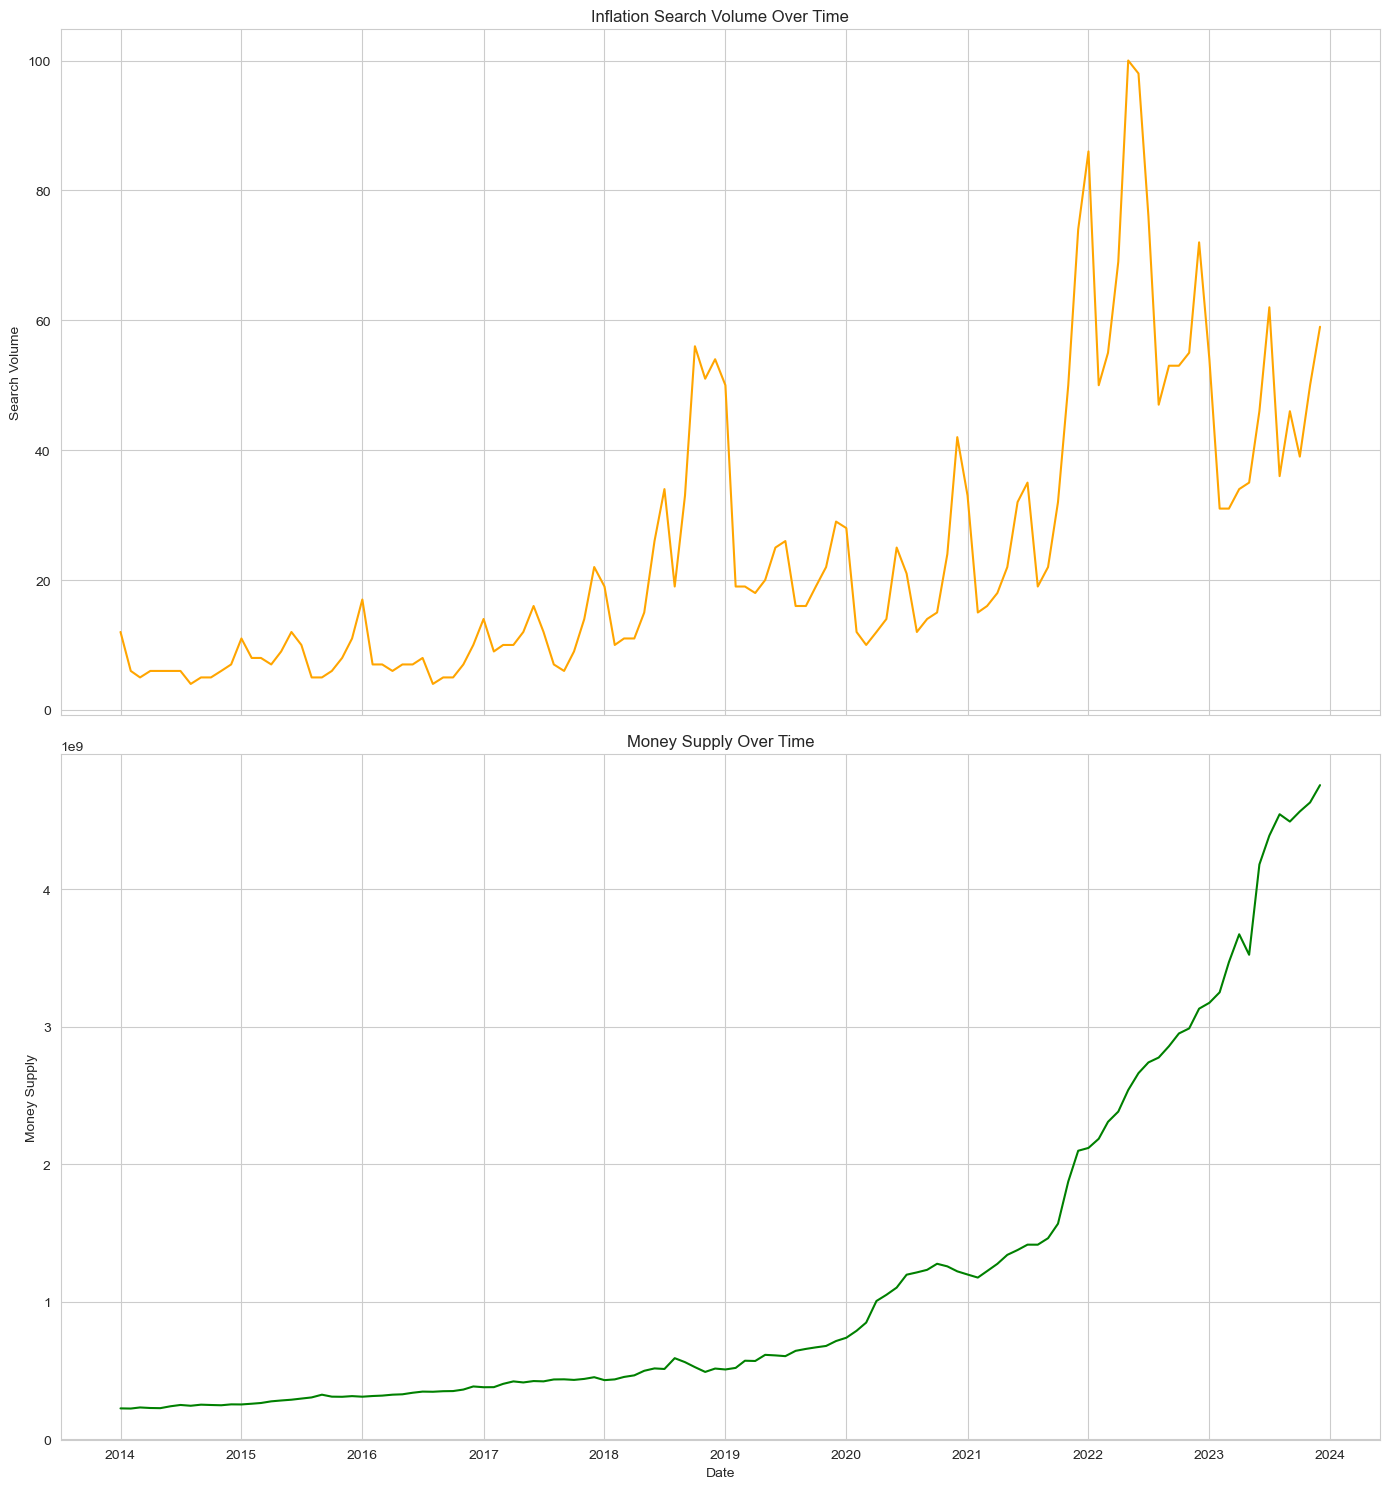

In [288]:
# Create a figure with 3 subplots, one above the other
fig, axes = plt.subplots(2, 1, figsize=(14, 15), sharex=True)

# Inflation Search Volume plot
axes[0].plot(google_trends_enflasyon_df['YEAR-MONTH-DAY'], google_trends_enflasyon_df['Search Volume Inflation'], color='orange')
axes[0].set_title('Inflation Search Volume Over Time')
axes[0].set_ylabel('Search Volume')

# Money Supply plot
axes[1].plot(para_arzi_df['YEAR-MONTH-DAY'], para_arzi_df['Money Supply'], color='green')
axes[1].set_title('Money Supply Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Money Supply')

# Adjust the layout so titles and labels don't overlap
plt.tight_layout()
plt.show()


### Relation between training data and target variable

In below we have relation between House Prices and training data. For Google trend serach there is pretty weak relation. However, moeny supply and House Prices has strong linear relation.

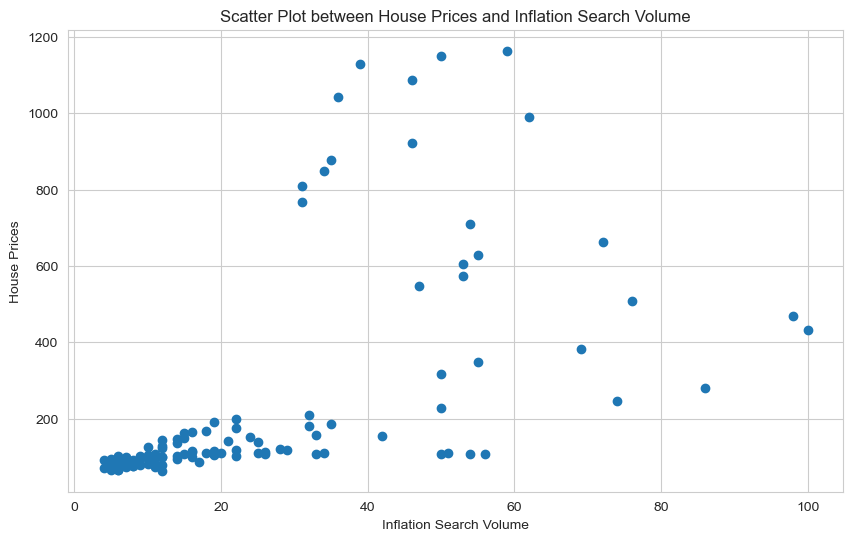

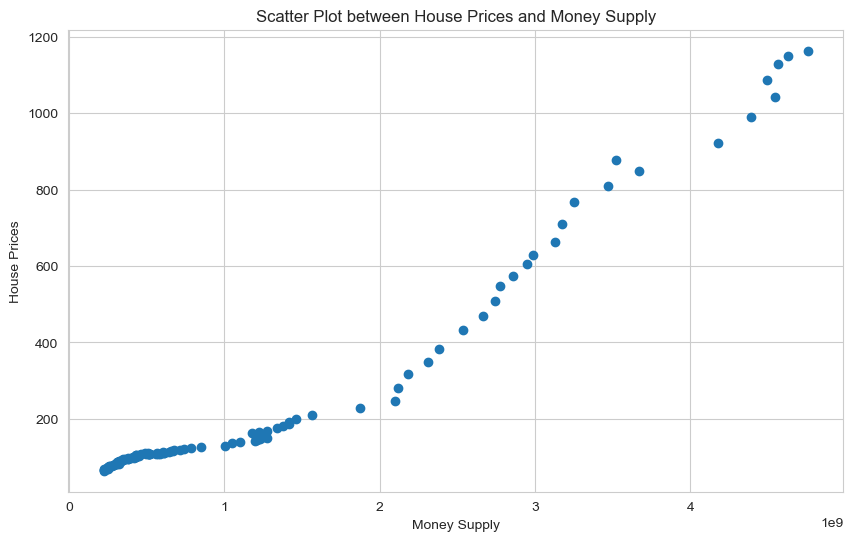

In [289]:
# Scatter plot between House Prices and Inflation Search Volume
plt.figure(figsize=(10, 6))
plt.scatter(google_trends_enflasyon_df['Search Volume Inflation'], konut_fiyatlari_df['House Prices'])
plt.title('Scatter Plot between House Prices and Inflation Search Volume')
plt.xlabel('Inflation Search Volume')
plt.ylabel('House Prices')
plt.show()

# Scatter plot between House Prices and Money Supply
plt.figure(figsize=(10, 6))
plt.scatter(para_arzi_df['Money Supply'], konut_fiyatlari_df['House Prices'])
plt.title('Scatter Plot between House Prices and Money Supply')
plt.xlabel('Money Supply')
plt.ylabel('House Prices')
plt.show()

### Data Decomposition

For each metric we can plot trend line, seasonality and residual plots to have better understanding.

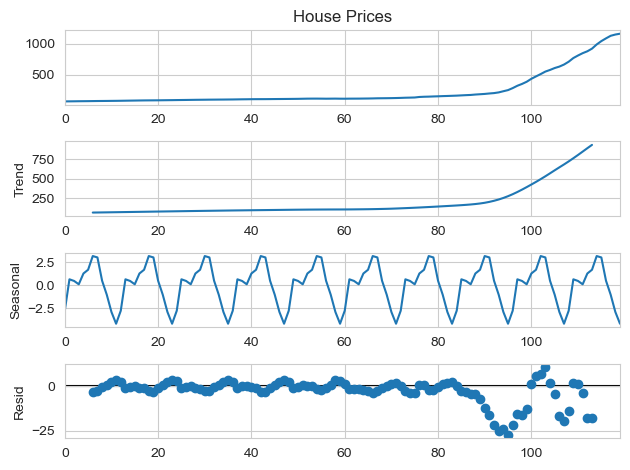

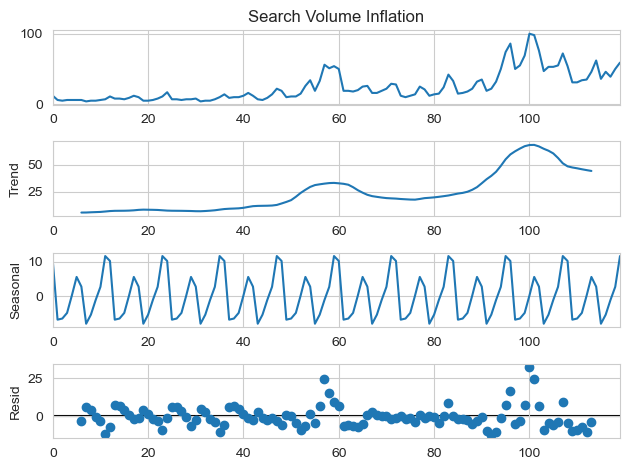

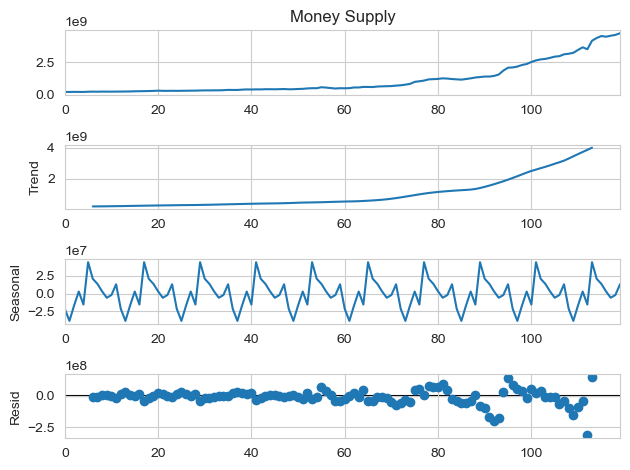

In [290]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the House Prices time series
result_house_prices = seasonal_decompose(konut_fiyatlari_df['House Prices'], model='additive', period=12)
result_house_prices.plot()
plt.show()

# Decompose the Inflation Search Volume time series
result_enflasyon_search_volume = seasonal_decompose(google_trends_enflasyon_df['Search Volume Inflation'], model='additive', period=12)
result_enflasyon_search_volume.plot()
plt.show()

# Decompose the Money Supply time series
result_money_supply = seasonal_decompose(para_arzi_df['Money Supply'], model='additive', period=12)
result_money_supply.plot()
plt.show()

### Model

In [291]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the traning data
google_trends_enflasyon_df['Search Volume Inflation Scaled'] = scaler.fit_transform(google_trends_enflasyon_df[['Search Volume Inflation']])
para_arzi_df['Money Supply Scaled'] = scaler.fit_transform(para_arzi_df[['Money Supply']])

Target Variable: House Prices

R-squared: 0.956
This number tells us how well our predictors (money supply and search volume for inflation) explain the changes in house prices. Here, it says that 95.6% of the variation in house prices can be explained by our model, which is quite high.

Prob (F-statistic): 5.39e-80
This is a probability that tells us whether the relationship we see in our data could be due to chance. Here, it's extremely low, meaning there's almost no chance that our findings are a coincidence.

Coefficients 
These numbers tell us how much house prices are expected to change with a one-unit change in the predictor variables, holding all else constant. For example, for every unit increase in the money supply, house prices are expected to increase by about 298 units.

P>|t| (for each predictor)
This shows the probability that the observed effect of each predictor could be due to chance. A low value  suggests the effect is likely not due to chance. In our model, both predictors show low p-values, indicating their significant impact on house prices.

Durbin-Watson: 0.177
This measures if there is a pattern in the order of the residuals. A value close to 2 suggests no pattern, while values far from 2 suggest patterns . Our value is quite low, hinting at a pattern that should be looked into.

Omnibus, Prob(Omnibus), Jarque-Bera (JB), Prob(JB)
These are tests that check if the residuals are normally distributed . Ideally, we want these tests to show that our residuals look like a normal distribution. In our case, there are some signs that our residuals might not be perfectly normal, but it's not extreme.

In simple terms, the model does a great job of explaining house prices based on the money supply and inflation search volume. However, the residuals show some patterns that we ideally wouldn't see, suggesting there might be more information to gain.

In [292]:
import statsmodels.api as sm

# Merge datasets on the date column for a combined DataFrame
combined_df = pd.merge_asof(konut_fiyatlari_df, google_trends_enflasyon_df, on='YEAR-MONTH-DAY')
combined_df = pd.merge_asof(combined_df, para_arzi_df, on='YEAR-MONTH-DAY')

# Fit the regression model using 'Search Volume' to explain 'Participation Rate'
X = combined_df[['Search Volume Inflation Scaled', 'Money Supply Scaled']]  # Independent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
Y = combined_df['House Prices']  # Dependent variable

model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           House Prices   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1266.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           5.39e-80
Time:                        17:57:17   Log-Likelihood:                -656.97
No. Observations:                 120   AIC:                             1320.
Df Residuals:                     117   BIC:                             1328.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

### Model evalutaion and residual analysis

Here we have Actual values vs Predicted values.

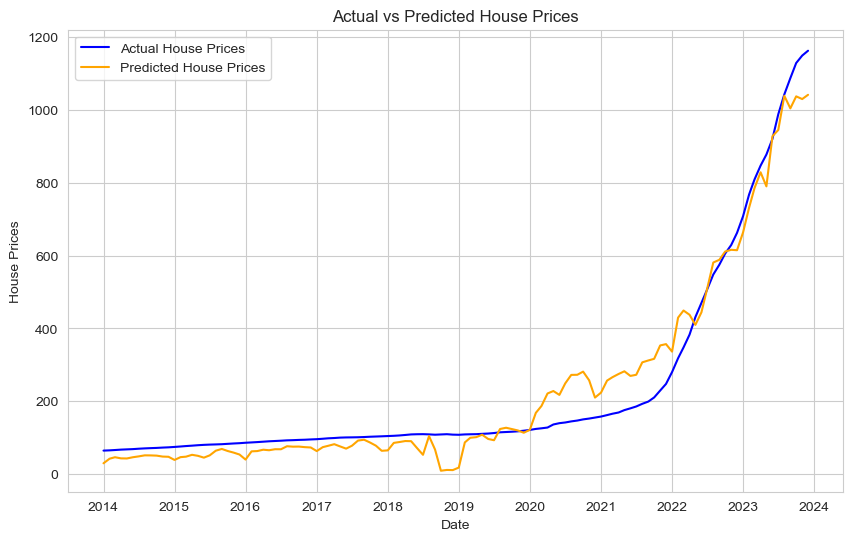

In [294]:
import matplotlib.pyplot as plt

# Generate predictions
predictions = model.predict()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(combined_df['YEAR-MONTH-DAY'], Y, label='Actual House Prices', color='blue')
plt.plot(combined_df['YEAR-MONTH-DAY'], predictions, label='Predicted House Prices', color='orange')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Date')
plt.ylabel('House Prices')
plt.legend()
plt.show()


Here are the residuals for prediction. It two peaks that can be improved. It is little of from normality assumption.

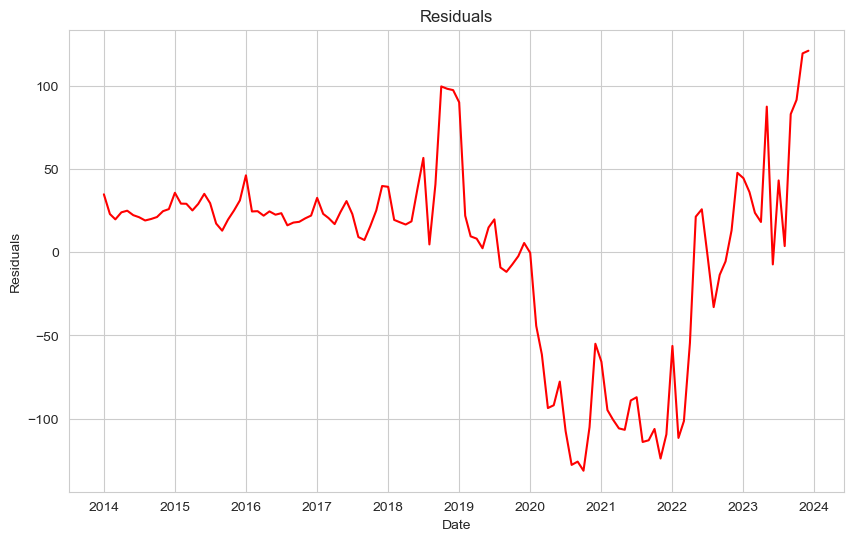

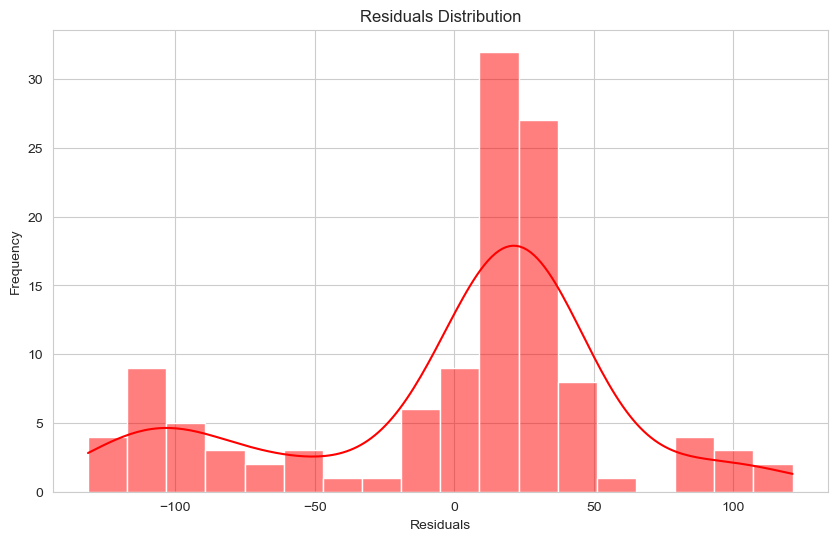

In [295]:
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(combined_df['YEAR-MONTH-DAY'], residuals, color='red')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Part 2 Additional data

In [362]:
# read data from csv
google_trends_resesyon = pd.read_csv('google_trends_RESESYON.csv')

# read data from excel
tuketici_guven_endeksi = pd.read_excel('tuketici_guven_endeksi.xlsx')

# read data from csv
google_trends_pandemi = pd.read_csv('google_trends_PANDEMI.csv')

# read data from csv
google_trends_otel_fiyat = pd.read_csv('google_trends_OTELFIYAT.csv')

In [363]:
# turn the data into a dataframe
google_trends_resesyon_df = pd.DataFrame(google_trends_resesyon)

# change column names
google_trends_resesyon_df.columns = ['YEAR-MONTH-DAY', 'Search Volume Recession']

google_trends_resesyon_df['YEAR-MONTH-DAY'] = pd.to_datetime(google_trends_resesyon_df['YEAR-MONTH-DAY']) # convert to datetime

google_trends_resesyon_df

,YEAR-MONTH-DAY,Search Volume Recession
0,2014-01-01,1
1,2014-02-01,1
2,2014-03-01,2
3,2014-04-01,2
4,2014-05-01,2
...,...,...
115,2023-08-01,11
116,2023-09-01,6
117,2023-10-01,6
118,2023-11-01,9


In [341]:
# turn the data into a dataframe
tuketici_guven_endeksi_df = pd.DataFrame(tuketici_guven_endeksi)

# change column names
tuketici_guven_endeksi_df.columns = ['YEAR-MONTH-DAY', 'Consumer Confidence Index']

tuketici_guven_endeksi_df['YEAR-MONTH-DAY'] = pd.to_datetime(tuketici_guven_endeksi_df['YEAR-MONTH-DAY']) # convert to datetime

tuketici_guven_endeksi_df

,YEAR-MONTH-DAY,Consumer Confidence Index
0,2014-01-01,115.358897
1,2014-02-01,114.864594
2,2014-03-01,114.135399
3,2014-04-01,114.240039
4,2014-05-01,114.335828
...,...,...
115,2023-08-01,111.928899
116,2023-09-01,110.827150
117,2023-10-01,109.813807
118,2023-11-01,111.397149


In [342]:
# turn the data into a dataframe
google_trends_pandemi_df = pd.DataFrame(google_trends_pandemi)

# change column names
google_trends_pandemi_df.columns = ['YEAR-MONTH-DAY', 'Search Volume Pandemic']

google_trends_pandemi_df['YEAR-MONTH-DAY'] = pd.to_datetime(google_trends_pandemi_df['YEAR-MONTH-DAY']) # convert to datetime

google_trends_pandemi_df

,YEAR-MONTH-DAY,Search Volume Pandemic
0,2014-01-01,0
1,2014-02-01,0
2,2014-03-01,0
3,2014-04-01,0
4,2014-05-01,0
...,...,...
115,2023-08-01,2
116,2023-09-01,2
117,2023-10-01,1
118,2023-11-01,1


In [351]:
# turn the data into a dataframe
google_trends_otel_fiyat_df = pd.DataFrame(google_trends_otel_fiyat)

# change column names
google_trends_otel_fiyat_df.columns = ['YEAR-MONTH-DAY', 'Search Volume Hotel Prices']

google_trends_otel_fiyat_df['YEAR-MONTH-DAY'] = pd.to_datetime(google_trends_otel_fiyat_df['YEAR-MONTH-DAY']) # convert to datetime

google_trends_otel_fiyat_df

,YEAR-MONTH-DAY,Search Volume Hotel Prices
0,2014-01-01,24
1,2014-02-01,24
2,2014-03-01,18
3,2014-04-01,23
4,2014-05-01,27
...,...,...
115,2023-08-01,70
116,2023-09-01,49
117,2023-10-01,32
118,2023-11-01,34


Here we have more seasonal and complex time series target data for Work force Participation Rate.

### Data exploration and visualition

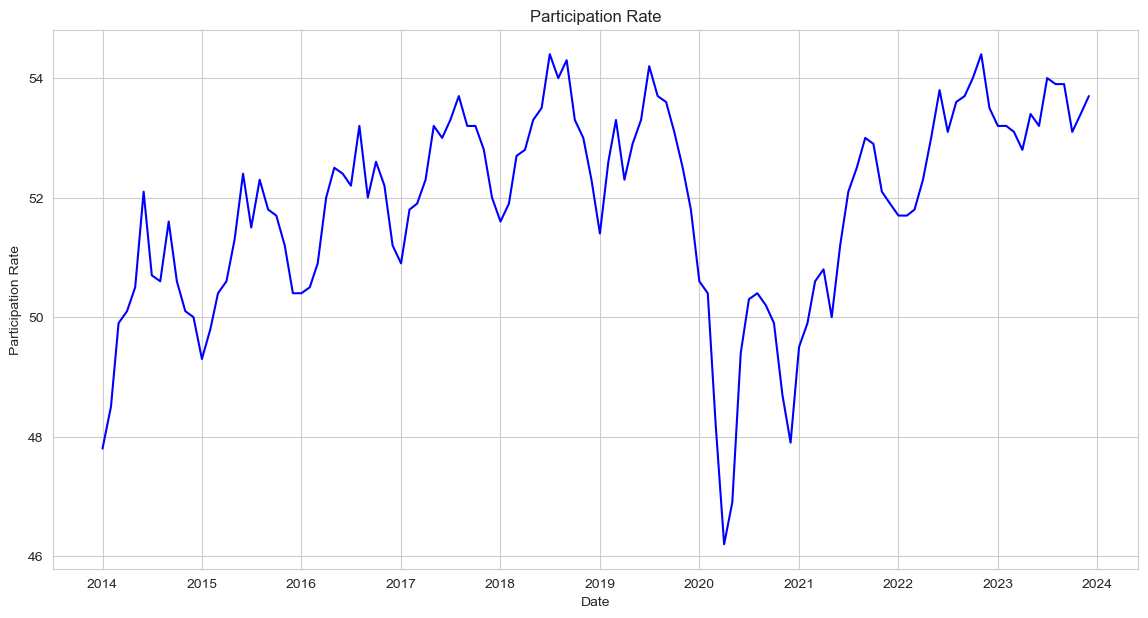

In [376]:
# Plot the time series data
plt.figure(figsize=(14, 7))

# Participation Rate plot
plt.plot(is_gucune_katilim_orani_df['YEAR-MONTH-DAY'], is_gucune_katilim_orani_df['Participation Rate'], label='Participation Rate', color='blue')
plt.title('Participation Rate')
plt.xlabel('Date')
plt.ylabel('Participation Rate')

plt.show()

Here are the training data 'RECESSION' Google trends data, Consumer Confidence Index data, 'PANDEMIC' and 'HOTEL PRICES Google trends data.
Pandemic explains dramatic decrease in 2020 and Hotel Prices explain seasonality for increasing rate in summers.

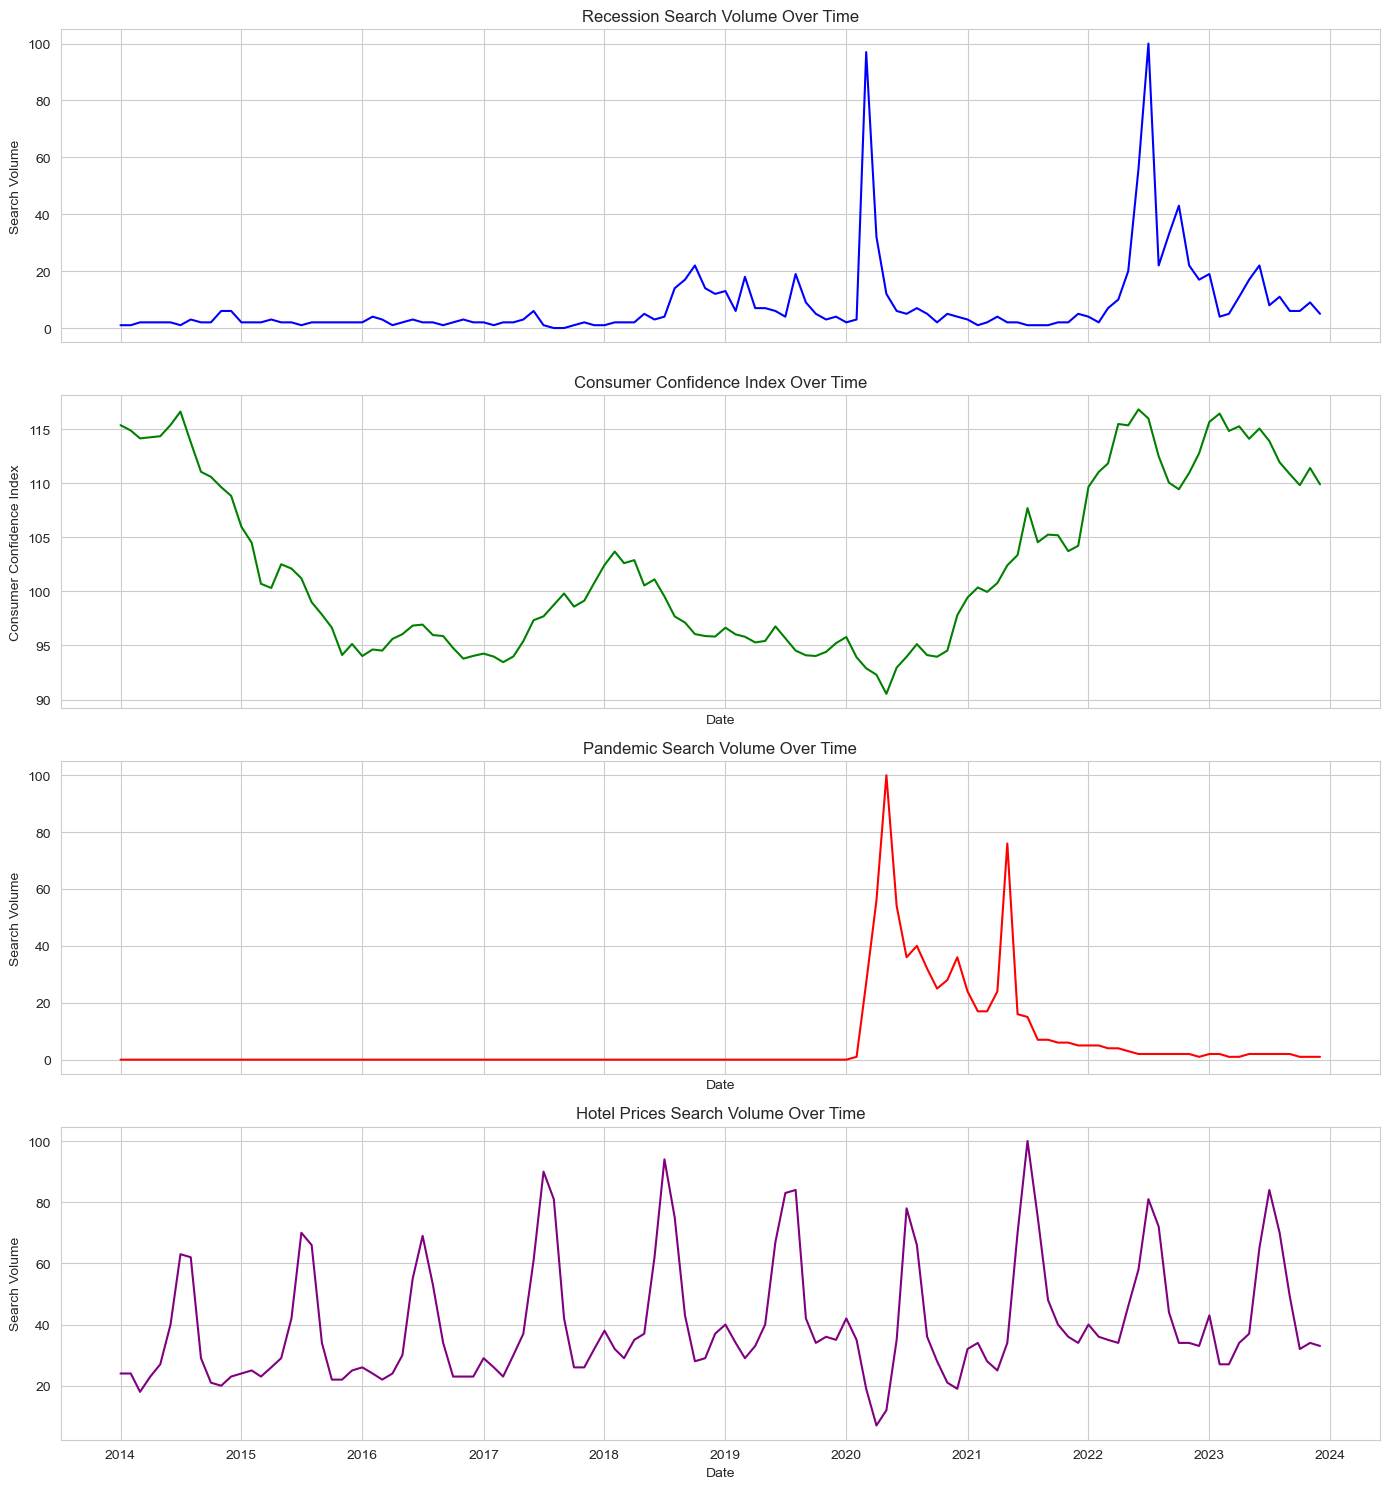

In [365]:
# Create a figure with 3 subplots, one above the other
fig, axes = plt.subplots(4, 1, figsize=(14, 15), sharex=True)

# Issizlik Maas Search Volume plot
axes[0].plot(google_trends_resesyon_df['YEAR-MONTH-DAY'], google_trends_resesyon_df['Search Volume Recession'], color='blue')
axes[0].set_title('Recession Search Volume Over Time')
axes[0].set_ylabel('Search Volume')

# Consumer Confidence Index plot
axes[1].plot(tuketici_guven_endeksi_df['YEAR-MONTH-DAY'], tuketici_guven_endeksi_df['Consumer Confidence Index'], color='green')
axes[1].set_title('Consumer Confidence Index Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Consumer Confidence Index')

# Pandemi Search Volume plot
axes[2].plot(google_trends_pandemi_df['YEAR-MONTH-DAY'], google_trends_pandemi_df['Search Volume Pandemic'], color='red')
axes[2].set_title('Pandemic Search Volume Over Time')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Search Volume')

# Hotel Prices Search Volume plot
axes[3].plot(google_trends_otel_fiyat_df['YEAR-MONTH-DAY'], google_trends_otel_fiyat_df['Search Volume Hotel Prices'], color='purple')
axes[3].set_title('Hotel Prices Search Volume Over Time')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Search Volume')

# Adjust the layout so titles and labels don't overlap
plt.tight_layout()
plt.show()

### Relation between training data and target variable

As it can bee seen in below, training data has weak correlation with the target data especially for first two Recession and CPI sets.

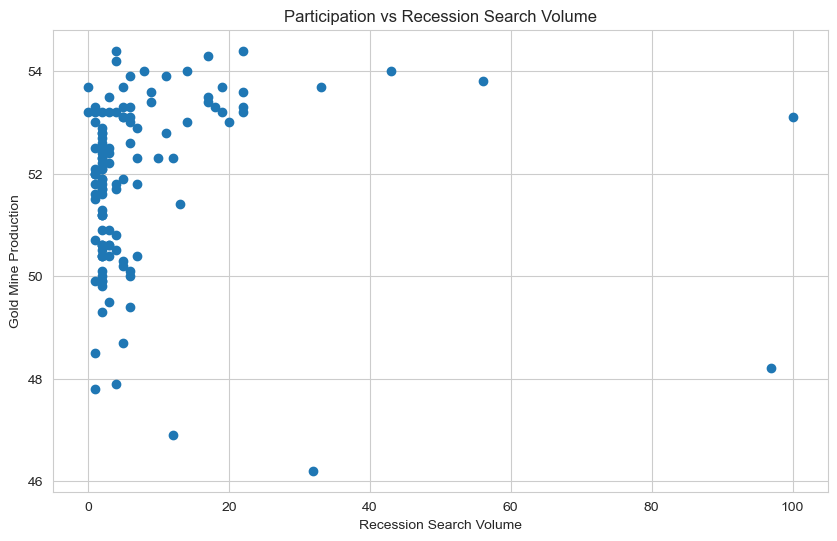

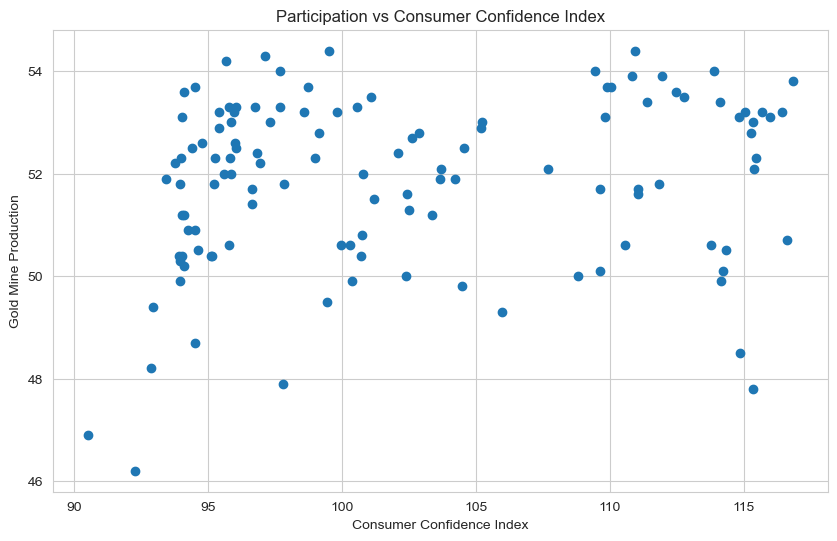

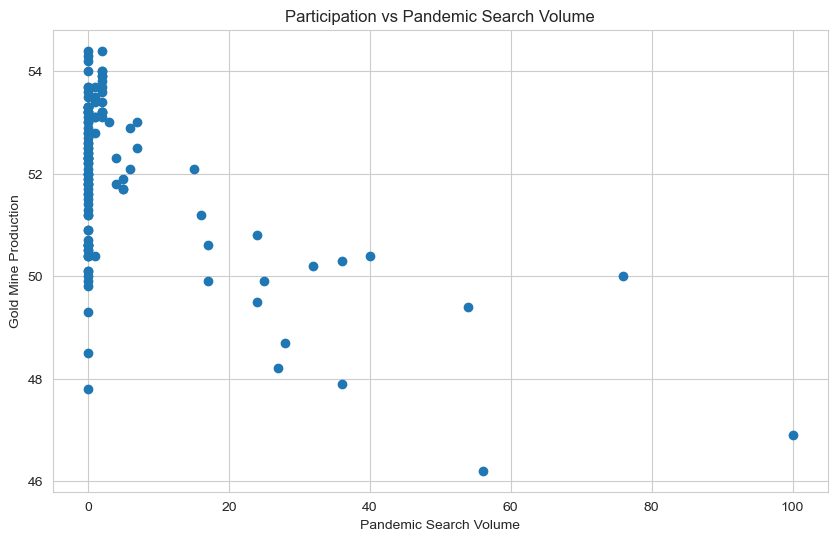

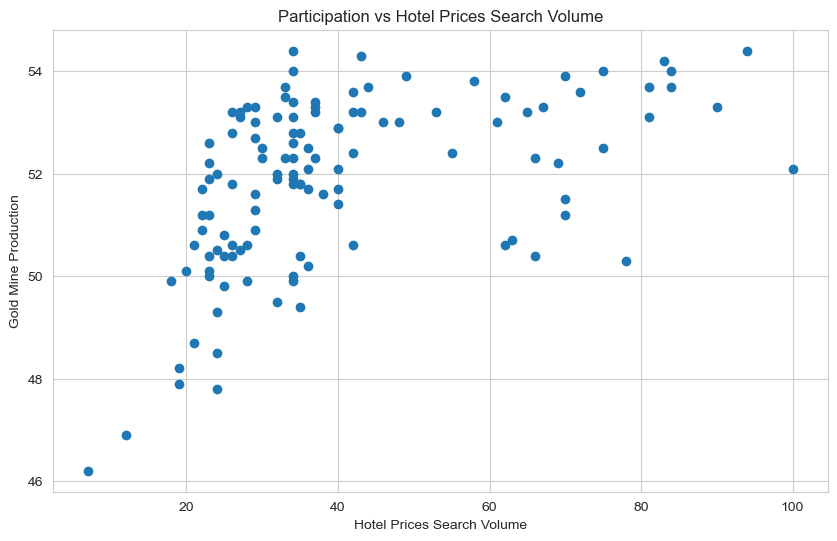

In [366]:
# Scatter plot between is_gucune_katilim_orani_df and Issizlik Maas Search Volume
plt.figure(figsize=(10, 6))
plt.scatter(google_trends_resesyon_df['Search Volume Recession'], is_gucune_katilim_orani_df['Participation Rate'])
plt.title('Participation vs Recession Search Volume')
plt.xlabel('Recession Search Volume')
plt.ylabel('Gold Mine Production')
plt.show()

# Scatter plot between is_gucune_katilim_orani_df and Consumer Confidence Index
plt.figure(figsize=(10, 6))
plt.scatter(tuketici_guven_endeksi_df['Consumer Confidence Index'], is_gucune_katilim_orani_df['Participation Rate'])
plt.title('Participation vs Consumer Confidence Index')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Gold Mine Production')
plt.show()

# Scatter plot between is_gucune_katilim_orani_df and Pandemi Search Volume
plt.figure(figsize=(10, 6))
plt.scatter(google_trends_pandemi_df['Search Volume Pandemic'], is_gucune_katilim_orani_df['Participation Rate'])
plt.title('Participation vs Pandemic Search Volume')
plt.xlabel('Pandemic Search Volume')
plt.ylabel('Gold Mine Production')
plt.show()

# Scatter plot between is_gucune_katilim_orani_df and Hotel Prices Search Volume
plt.figure(figsize=(10, 6))
plt.scatter(google_trends_otel_fiyat_df['Search Volume Hotel Prices'], is_gucune_katilim_orani_df['Participation Rate'])
plt.title('Participation vs Hotel Prices Search Volume')
plt.xlabel('Hotel Prices Search Volume')
plt.ylabel('Gold Mine Production')
plt.show()

### Data decomposition

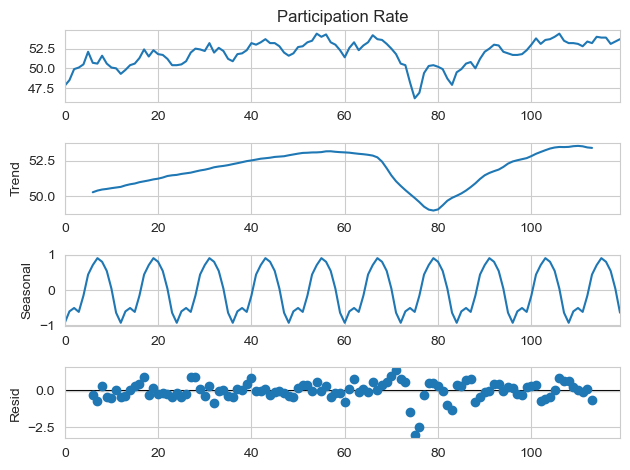

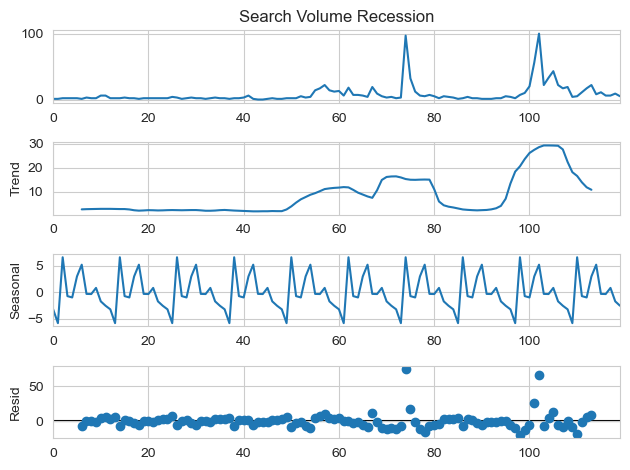

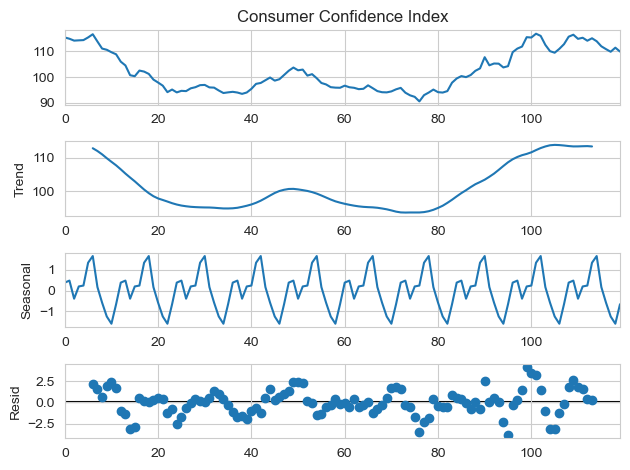

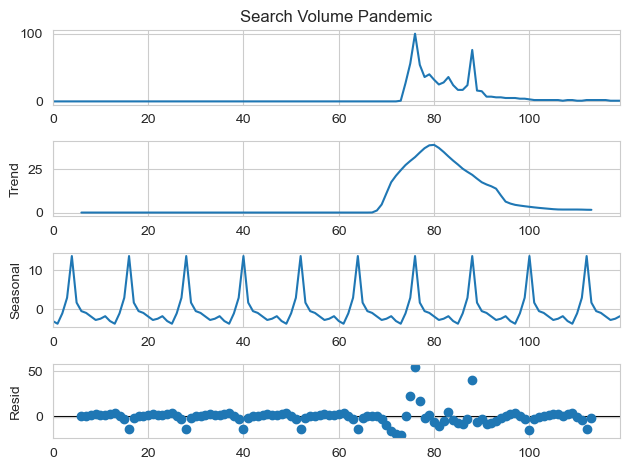

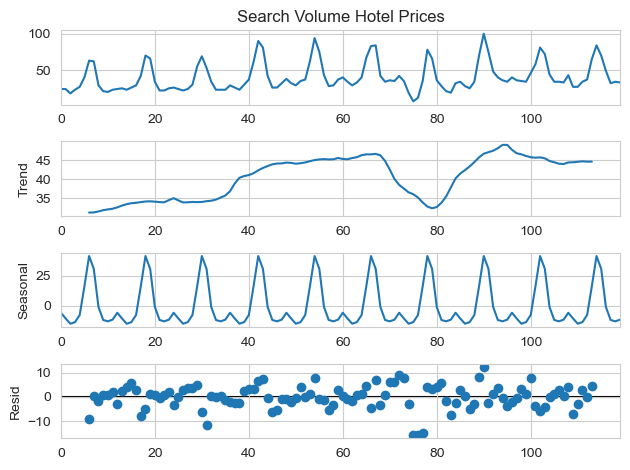

In [367]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the is_gucune_katilim_orani_df time series
result_gold_mine_production = seasonal_decompose(is_gucune_katilim_orani_df['Participation Rate'], model='additive', period=12)
result_gold_mine_production.plot()
plt.show()

# Decompose the recession search volume time series
result_recession_search_volume = seasonal_decompose(google_trends_resesyon_df['Search Volume Recession'], model='additive', period=12)
result_recession_search_volume.plot()
plt.show()

# Decompose the Consumer Confidence Index time series
result_consumer_confidence = seasonal_decompose(tuketici_guven_endeksi_df['Consumer Confidence Index'], model='additive', period=12)
result_consumer_confidence.plot()
plt.show()

# Decompose the Pandemi Search Volume time series
result_pandemi_search_volume = seasonal_decompose(google_trends_pandemi_df['Search Volume Pandemic'], model='additive', period=12)
result_pandemi_search_volume.plot()
plt.show()

# Decompose the Hotel Prices Search Volume time series
result_hotel_prices_search_volume = seasonal_decompose(google_trends_otel_fiyat_df['Search Volume Hotel Prices'], model='additive', period=12)
result_hotel_prices_search_volume.plot()
plt.show()



In [368]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the traning data
google_trends_resesyon_df['Search Volume Recession Scaled'] = scaler.fit_transform(google_trends_resesyon_df[['Search Volume Recession']])
tuketici_guven_endeksi_df['Consumer Confidence Index Scaled'] = scaler.fit_transform(tuketici_guven_endeksi_df[['Consumer Confidence Index']])
google_trends_pandemi_df['Search Volume Pandemic Scaled'] = scaler.fit_transform(google_trends_pandemi_df[['Search Volume Pandemic']])
google_trends_otel_fiyat_df['Search Volume Hotel Prices Scaled'] = scaler.fit_transform(google_trends_otel_fiyat_df[['Search Volume Hotel Prices']])


Target Variable: Participation Rate


R-squared: 0.502
This tells us that our model explains 50.2% of the variation in the participation rate.

Prob (F-statistic): 1.12e-16
This test checks if our predictors have a statistically significant relationship with the participation rate. A big F-statistic and a tiny probability value tell us it's very unlikely our results happened by chance. In other words, our predictors are meaningful.

Coefficients 
Search Volume Recession Scaled: Each unit increase in this predictor increases the participation rate by 0.1507, but this isn't statistically significant (P>|t| = 0.182).
Consumer Confidence Index Scaled: Has a very small and statistically insignificant negative effect on participation rate.
Search Volume Pandemic Scaled: Each unit increase leads to a decrease in the participation rate by 0.8717, and this is statistically significant.
Search Volume Hotel Prices Scaled: Increases the participation rate by 0.6813 per unit increase, also significant.

Omnibus and Prob(Omnibus): These tests check if the residuals  are normally distributed. A lower value suggests they might not be, but our model doesn't show strong evidence of a problem here.
Durbin-Watson: A test for autocorrelation in the residuals. Values close to 2 suggest no autocorrelation. Our value of 0.637 indicates some level of positive autocorrelation.
Skewness and Kurtosis: Measure the symmetry and peakness of the residuals' distribution, respectively. Our model shows a slight skew.

Conclusion:
Our model is fairly good at explaining changes in the participation rate, with significant predictors like the search volumes for pandemics decreasing the rate and hotel prices increasing it. However, not all predictors are significant, and there's some indication of autocorrelation among the residuals, suggesting room for improvement in model fit or the need for additional analysis to capture more complex relationships.

### Model

In [369]:
import statsmodels.api as sm

# Merge datasets on the date column for a combined DataFrame
combined_df = pd.merge_asof(is_gucune_katilim_orani_df, google_trends_resesyon_df, on='YEAR-MONTH-DAY')
combined_df = pd.merge_asof(combined_df, tuketici_guven_endeksi_df, on='YEAR-MONTH-DAY')
combined_df = pd.merge_asof(combined_df, google_trends_pandemi_df, on='YEAR-MONTH-DAY')
combined_df = pd.merge_asof(combined_df, google_trends_otel_fiyat_df, on='YEAR-MONTH-DAY')

# Fit the regression model using 'Search Volume' to explain 'Participation Rate'
X = combined_df[['Search Volume Recession Scaled', 'Consumer Confidence Index Scaled', 'Search Volume Pandemic Scaled', 'Search Volume Hotel Prices Scaled']]  # Independent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
Y = combined_df['Participation Rate']  # Dependent variable

model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Participation Rate   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     29.02
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           1.12e-16
Time:                        19:03:46   Log-Likelihood:                -188.83
No. Observations:                 120   AIC:                             387.7
Df Residuals:                     115   BIC:                             401.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

###  Model evaluation and residual analysis

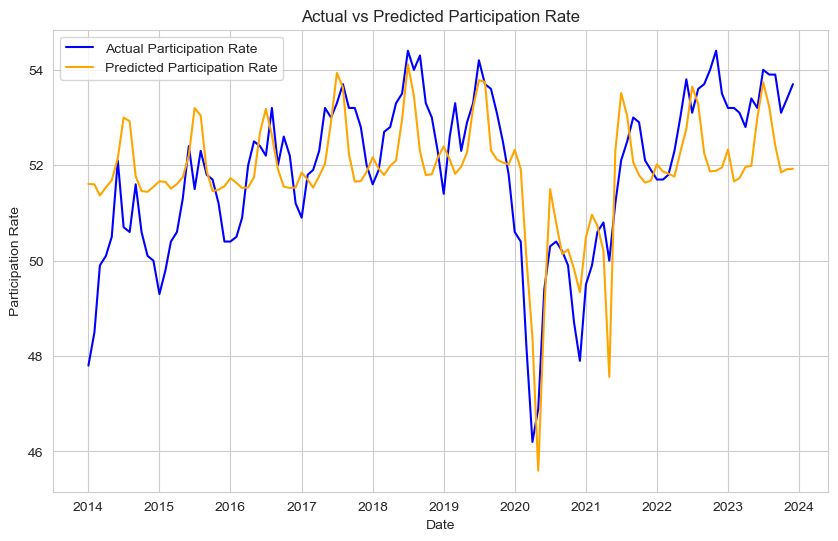

In [360]:
import matplotlib.pyplot as plt

# Generate predictions
predictions = model.predict()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(combined_df['YEAR-MONTH-DAY'], Y, label='Actual Participation Rate', color='blue')
plt.plot(combined_df['YEAR-MONTH-DAY'], predictions, label='Predicted Participation Rate', color='orange')
plt.title('Actual vs Predicted Participation Rate')
plt.xlabel('Date')
plt.ylabel('Participation Rate')
plt.legend()
plt.show()

In residuals we have mean greater then 0 also have trend and sesonality which means model should be improved. Since we already used 4 training data we will stop here.

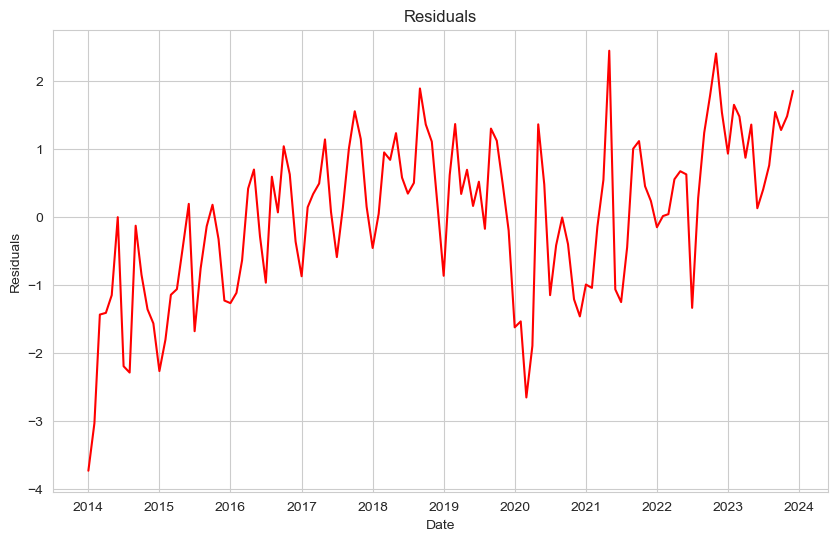

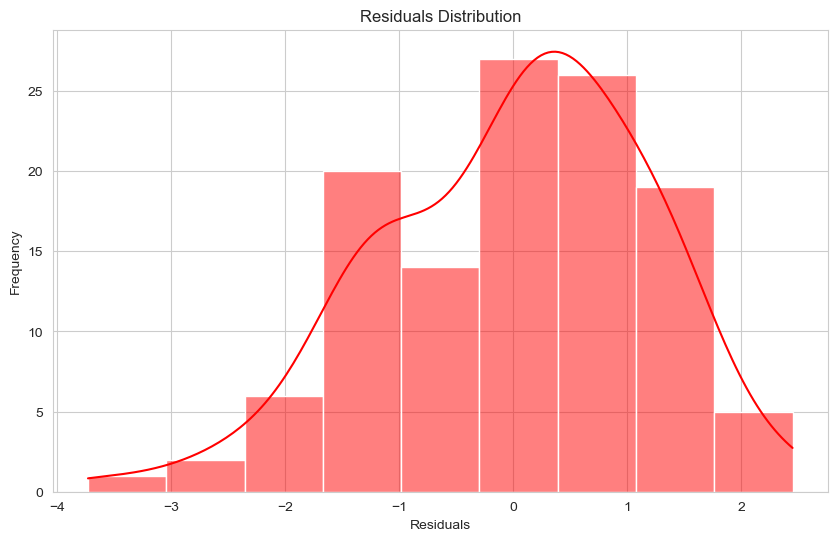

In [377]:
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(combined_df['YEAR-MONTH-DAY'], residuals, color='red')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Part 3 Additional data

In [461]:
# read data from csv
google_trends_dolar_kuru = pd.read_csv('google_trends_DOLARKURU.csv')

# read data from excel
kisa_vade_dis_borc = pd.read_excel('kisa_vade_dis_borc.xlsx')

# read data from excel
tufe = pd.read_excel('tufe.xlsx')

# read data from csv
google_trends_swap = pd.read_csv('google_trends_SWAP.csv')

# read data from excel
yurtdisi_yatirim = pd.read_excel('yurtdisi_yatirim.xlsx')

In [462]:
# turn the data into a dataframe
google_trends_dolar_kuru_df = pd.DataFrame(google_trends_dolar_kuru)

# change column names
google_trends_dolar_kuru_df.columns = ['YEAR-MONTH-DAY', 'Search Volume Exchange Rate']

google_trends_dolar_kuru_df['YEAR-MONTH-DAY'] = pd.to_datetime(google_trends_dolar_kuru_df['YEAR-MONTH-DAY']) # convert to datetime

google_trends_dolar_kuru_df

,YEAR-MONTH-DAY,Search Volume Exchange Rate
0,2014-01-01,2
1,2014-02-01,1
2,2014-03-01,1
3,2014-04-01,1
4,2014-05-01,2
...,...,...
115,2023-08-01,24
116,2023-09-01,20
117,2023-10-01,22
118,2023-11-01,16


In [463]:
# turn the data into a dataframe
kisa_vade_dis_borc_df = pd.DataFrame(kisa_vade_dis_borc)

# change column names
kisa_vade_dis_borc_df.columns = ['YEAR-MONTH-DAY', 'Short Term External Debt']

kisa_vade_dis_borc_df['YEAR-MONTH-DAY'] = pd.to_datetime(kisa_vade_dis_borc_df['YEAR-MONTH-DAY']) # convert to datetime

kisa_vade_dis_borc_df

,YEAR-MONTH-DAY,Short Term External Debt
0,2014-01-01,137524
1,2014-02-01,136197
2,2014-03-01,135795
3,2014-04-01,139939
4,2014-05-01,143265
...,...,...
115,2023-08-01,169148
116,2023-09-01,168541
117,2023-10-01,170808
118,2023-11-01,172129


In [464]:
# turn the data into a dataframe
tufe_df = pd.DataFrame(tufe)

# change column names
tufe_df.columns = ['YEAR-MONTH-DAY', 'CPI']

tufe_df['YEAR-MONTH-DAY'] = pd.to_datetime(tufe_df['YEAR-MONTH-DAY']) # convert to datetime

tufe_df

,YEAR-MONTH-DAY,CPI
0,2014-01-01,233.54
1,2014-02-01,234.54
2,2014-03-01,237.18
3,2014-04-01,240.37
4,2014-05-01,241.32
...,...,...
115,2023-08-01,1614.31
116,2023-09-01,1691.04
117,2023-10-01,1749.11
118,2023-11-01,1806.50


In [465]:
# turn the data into a dataframe
google_trends_swap_df = pd.DataFrame(google_trends_swap)

# change column names
google_trends_swap_df.columns = ['YEAR-MONTH-DAY', 'Search Volume Swap']


google_trends_swap_df['YEAR-MONTH-DAY'] = pd.to_datetime(google_trends_swap_df['YEAR-MONTH-DAY']) # convert to datetime

google_trends_swap_df

,YEAR-MONTH-DAY,Search Volume Swap
0,2014-01-01,8
1,2014-02-01,8
2,2014-03-01,8
3,2014-04-01,12
4,2014-05-01,10
...,...,...
115,2023-08-01,16
116,2023-09-01,14
117,2023-10-01,16
118,2023-11-01,18


In [466]:
# turn the data into a dataframe
yurtdisi_yatirim_df = pd.DataFrame(yurtdisi_yatirim)

# change column names
yurtdisi_yatirim_df.columns = ['YEAR-MONTH-DAY', 'Foreign Investment']

yurtdisi_yatirim_df['YEAR-MONTH-DAY'] = pd.to_datetime(yurtdisi_yatirim_df['YEAR-MONTH-DAY']) # convert to datetime

yurtdisi_yatirim_df

,YEAR-MONTH-DAY,Foreign Investment
0,2014-01-01,104655.0
1,2014-02-01,106448.0
2,2014-03-01,105951.7
3,2014-04-01,109115.8
4,2014-05-01,110339.9
...,...,...
115,2023-08-01,74862.0
116,2023-09-01,81567.0
117,2023-10-01,81903.0
118,2023-11-01,90367.0


### Data exploration and visualition

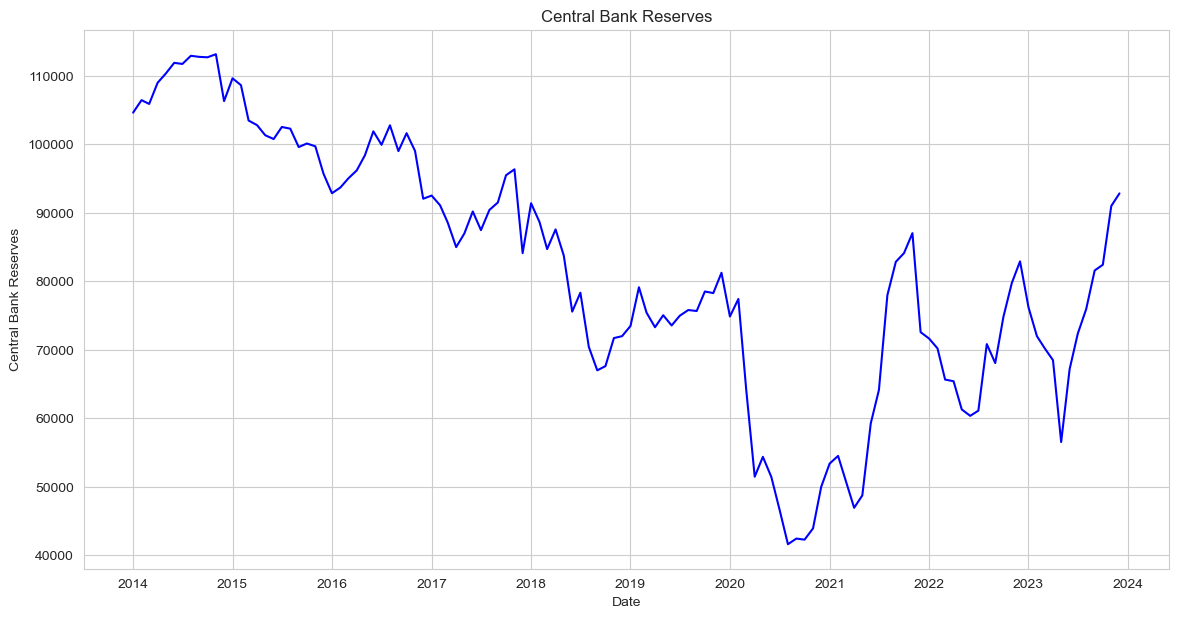

In [467]:
# Plot the time series data
plt.figure(figsize=(14, 7))

# Participation Rate plot
plt.plot(merkez_bankasi_rezerv_df['YEAR-MONTH-DAY'], merkez_bankasi_rezerv_df['Central Bank Reserves'], label='Central Bank Reserves', color='blue')
plt.title('Central Bank Reserves')
plt.xlabel('Date')
plt.ylabel('Central Bank Reserves')

plt.show()

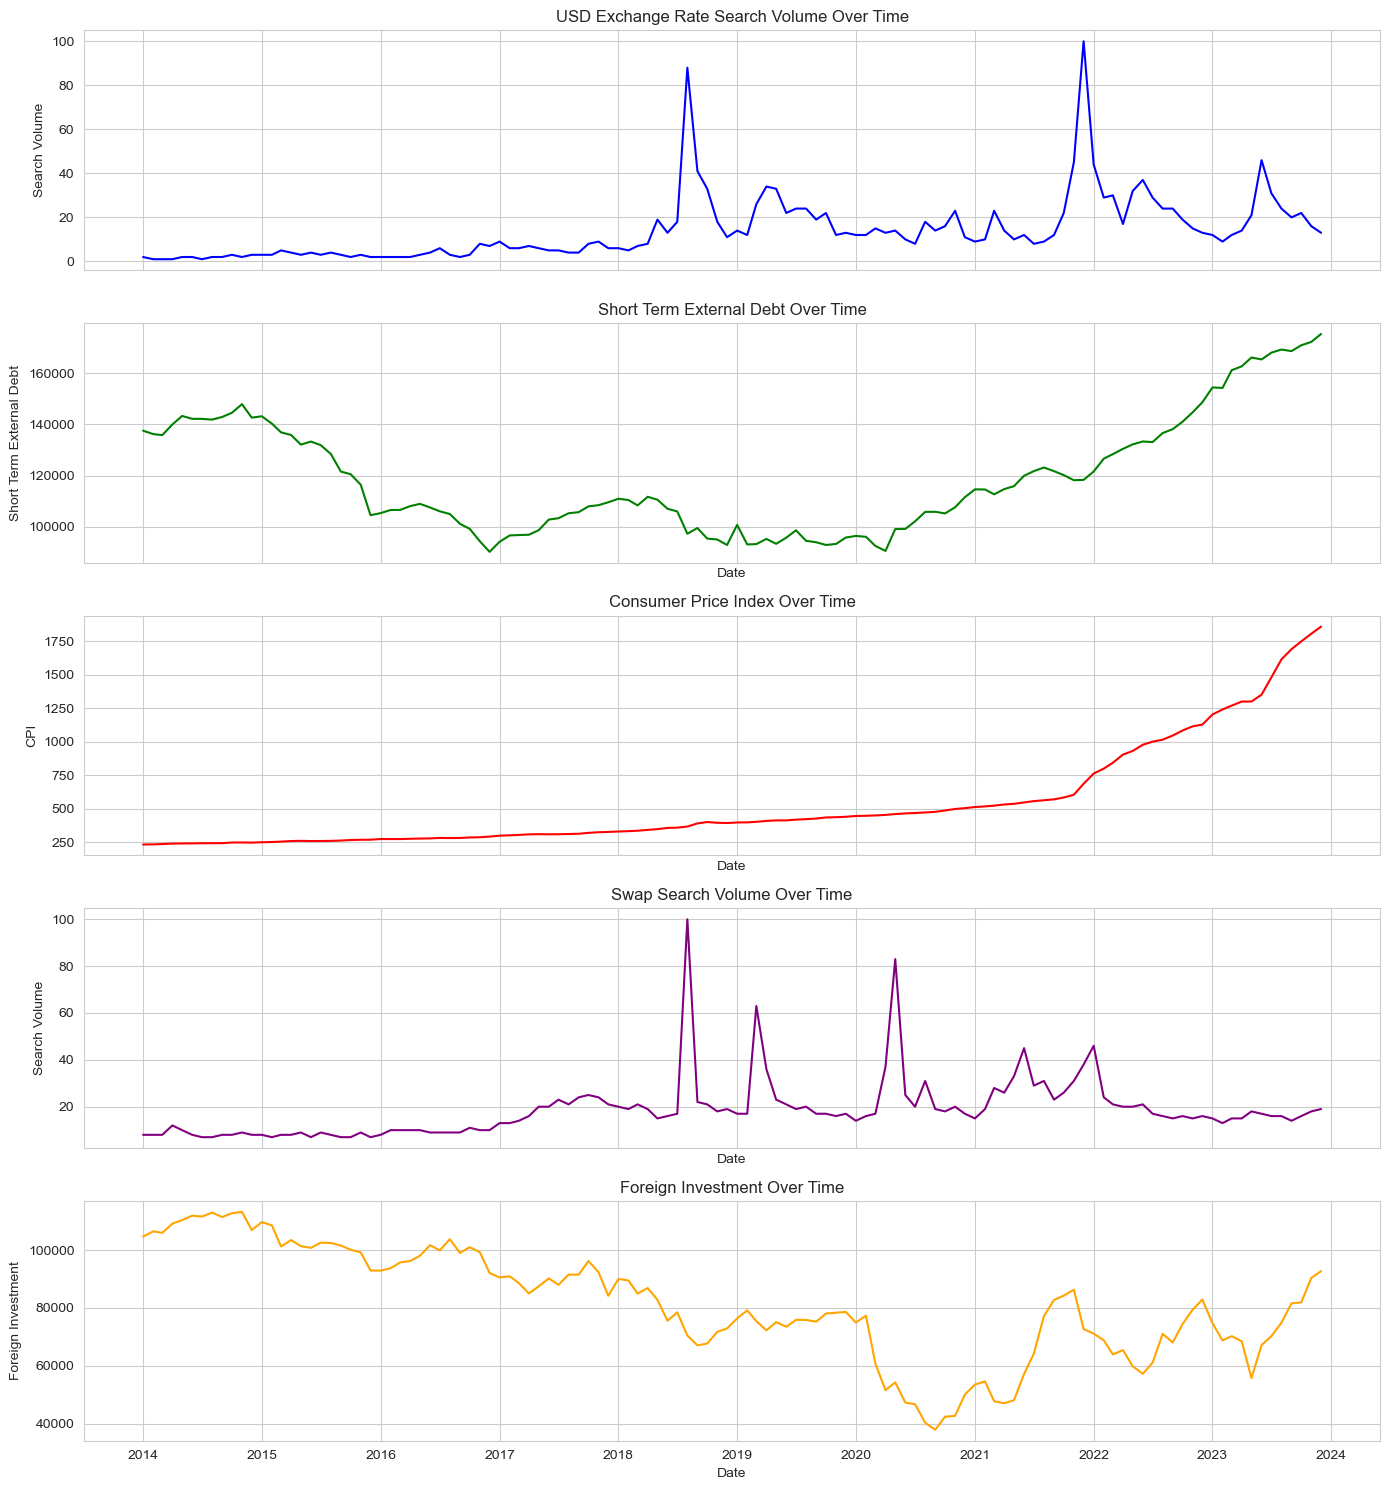

In [468]:
# Create a figure with 3 subplots, one above the other
fig, axes = plt.subplots(5, 1, figsize=(14, 15), sharex=True)

# USD Exchange Rate Search Volume plot
axes[0].plot(google_trends_dolar_kuru_df['YEAR-MONTH-DAY'], google_trends_dolar_kuru_df['Search Volume Exchange Rate'], color='blue')
axes[0].set_title('USD Exchange Rate Search Volume Over Time')
axes[0].set_ylabel('Search Volume')


# Short Term External Debt plot
axes[1].plot(kisa_vade_dis_borc_df['YEAR-MONTH-DAY'], kisa_vade_dis_borc_df['Short Term External Debt'], color='green')
axes[1].set_title('Short Term External Debt Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Short Term External Debt')

# CPI plot
axes[2].plot(tufe_df['YEAR-MONTH-DAY'], tufe_df['CPI'], color='red')
axes[2].set_title('Consumer Price Index Over Time')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('CPI')

# Swap Search Volume plot
axes[3].plot(google_trends_swap_df['YEAR-MONTH-DAY'], google_trends_swap_df['Search Volume Swap'], color='purple')
axes[3].set_title('Swap Search Volume Over Time')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Search Volume')

# Foreign Investment plot
axes[4].plot(yurtdisi_yatirim_df['YEAR-MONTH-DAY'], yurtdisi_yatirim_df['Foreign Investment'], color='orange')
axes[4].set_title('Foreign Investment Over Time')
axes[4].set_xlabel('Date')
axes[4].set_ylabel('Foreign Investment')


# Adjust the layout so titles and labels don't overlap
plt.tight_layout()
plt.show()

### Relation between training data and target variable

In below there are five different training data but until the Foreign investment correlation between data and target is limited. 
Foreign investment and CB reserves has almost perfect linear correlation.

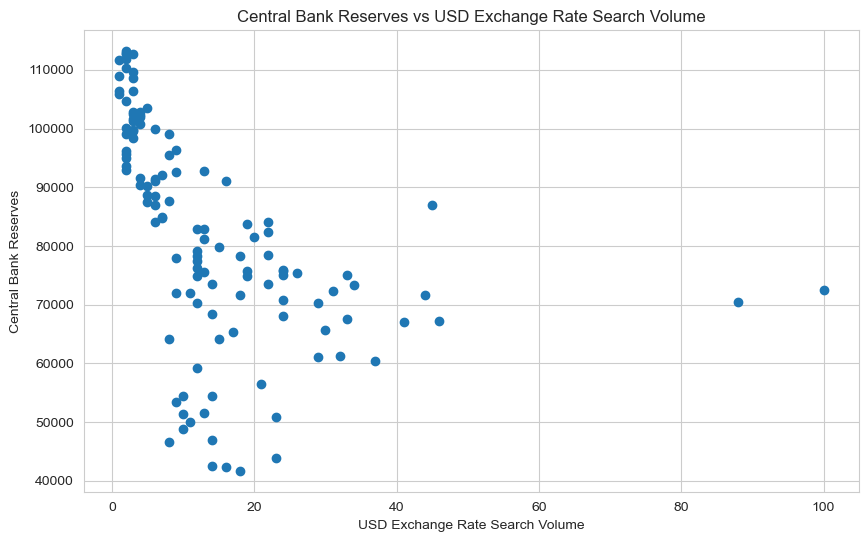

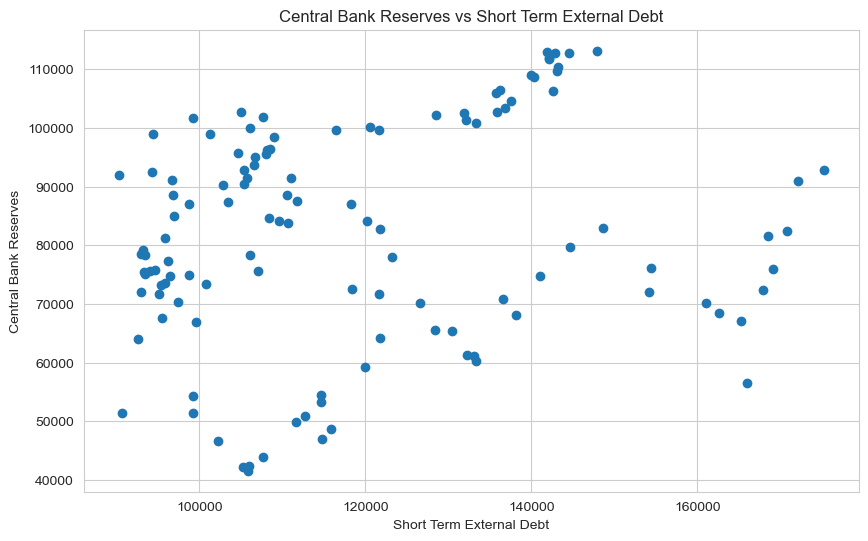

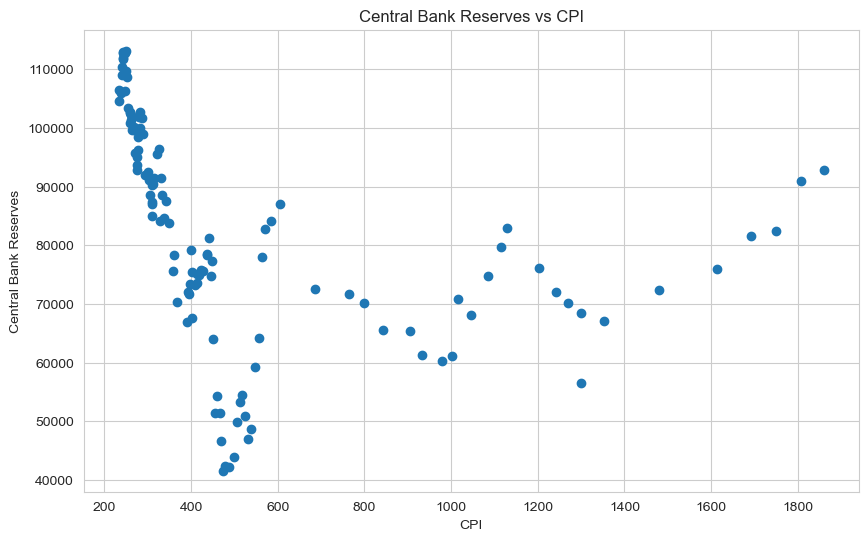

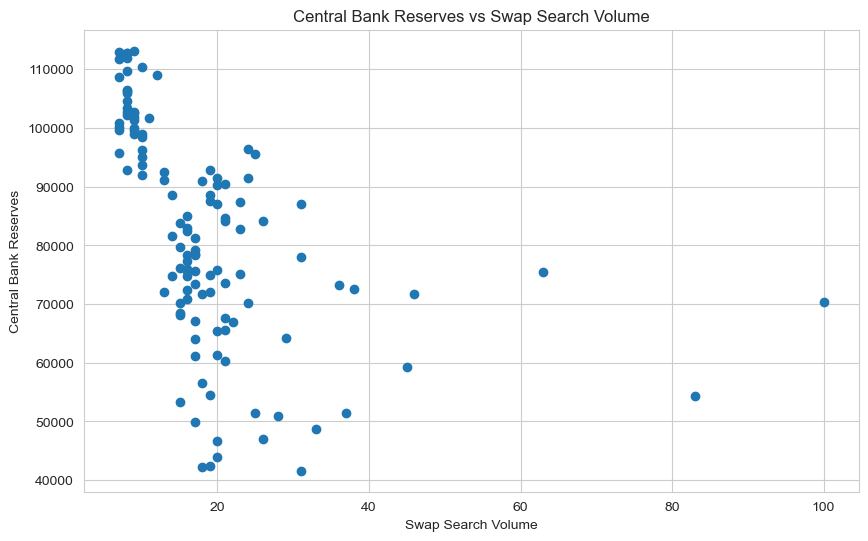

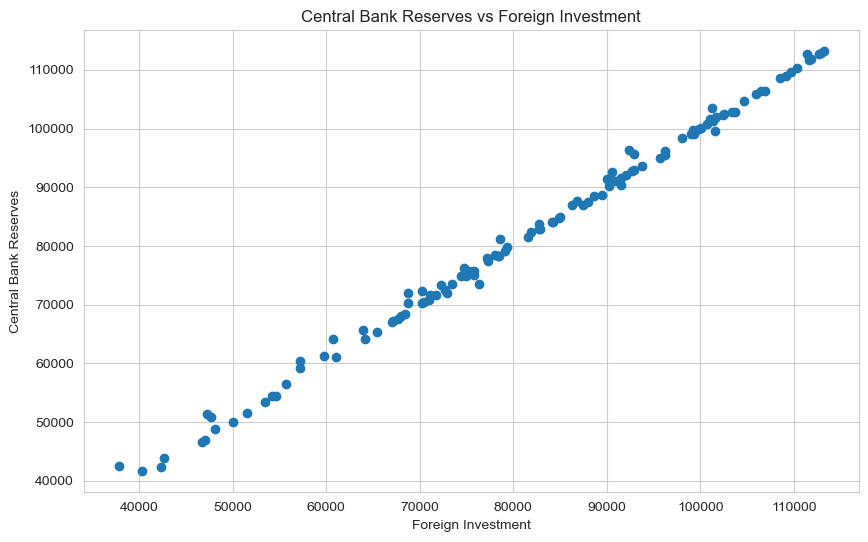

In [469]:
# Scatter plot between merkez_bankasi_rezerv_df and USD Exchange Rate Search Volume
plt.figure(figsize=(10, 6))
plt.scatter(google_trends_dolar_kuru_df['Search Volume Exchange Rate'], merkez_bankasi_rezerv_df['Central Bank Reserves'])
plt.title('Central Bank Reserves vs USD Exchange Rate Search Volume')
plt.xlabel('USD Exchange Rate Search Volume')
plt.ylabel('Central Bank Reserves')
plt.show()

# Scatter plot between merkez_bankasi_rezerv_df and Short Term External Debt
plt.figure(figsize=(10, 6))
plt.scatter(kisa_vade_dis_borc_df['Short Term External Debt'], merkez_bankasi_rezerv_df['Central Bank Reserves'])
plt.title('Central Bank Reserves vs Short Term External Debt')
plt.xlabel('Short Term External Debt')
plt.ylabel('Central Bank Reserves')
plt.show()

# Scatter plot between merkez_bankasi_rezerv_df and CPI
plt.figure(figsize=(10, 6))
plt.scatter(tufe_df['CPI'], merkez_bankasi_rezerv_df['Central Bank Reserves'])
plt.title('Central Bank Reserves vs CPI')
plt.xlabel('CPI')
plt.ylabel('Central Bank Reserves')
plt.show()

# Scatter plot between merkez_bankasi_rezerv_df and Swap Search Volume
plt.figure(figsize=(10, 6))
plt.scatter(google_trends_swap_df['Search Volume Swap'], merkez_bankasi_rezerv_df['Central Bank Reserves'])
plt.title('Central Bank Reserves vs Swap Search Volume')
plt.xlabel('Swap Search Volume')
plt.ylabel('Central Bank Reserves')
plt.show()

# Scatter plot between merkez_bankasi_rezerv_df and Foreign Investment
plt.figure(figsize=(10, 6))
plt.scatter(yurtdisi_yatirim_df['Foreign Investment'], merkez_bankasi_rezerv_df['Central Bank Reserves'])
plt.title('Central Bank Reserves vs Foreign Investment')
plt.xlabel('Foreign Investment')
plt.ylabel('Central Bank Reserves')
plt.show()

In [470]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the traning data
google_trends_dolar_kuru_df['Search Volume Exchange Rate Scaled'] = scaler.fit_transform(google_trends_dolar_kuru_df[['Search Volume Exchange Rate']])
kisa_vade_dis_borc_df['Short Term External Debt Scaled'] = scaler.fit_transform(kisa_vade_dis_borc_df[['Short Term External Debt']])
tufe_df['CPI Scaled'] = scaler.fit_transform(tufe_df[['CPI']])
google_trends_swap_df['Search Volume Swap Scaled'] = scaler.fit_transform(google_trends_swap_df[['Search Volume Swap']])
yurtdisi_yatirim_df['Foreign Investment Scaled'] = scaler.fit_transform(yurtdisi_yatirim_df[['Foreign Investment']])

Target Variable: Central Bank Reserves


R-squared: 0.997
Nearly all (99.7%) of the variation in central bank reserves can be explained by our model. 

F-statistic and Prob (F-statistic)
The F-statistic is very high, and the probability is exceptionally low (near zero), indicating that the model is statistically significant. 

Coefficients
const (8.176e+04): This is the model's intercept.

Predictors: Each coefficient shows the change in central bank reserves for a one-unit increase in the predictor, holding all else constant.
Most predictors (Exchange Rate, CPI, Swap Scaled) are not significant in predicting central bank reserves, given their high p-values.
Foreign Investment Scaled (1.844e+04): Significantly predicts central bank reserves, with a substantial positive effect. This suggests that as foreign investment increases, so do central bank reserves.

Durbin-Watson: Close to 2 (2.198), suggesting there is no autocorrelation in the residuals of the model. This is good as it means the residuals are independent of each other.
Omnibus/Prob(Omnibus) and Jarque-Bera (JB)/Prob(JB): Indicate that the residuals are not normally distributed, showing some potential issues with the model's underlying assumptions.

Conclusion:
The model shows an exceptionally high ability to predict central bank reserves, mainly driven by foreign investment. While the fit is almost perfect, the diagnostics suggest some concerns with the normality of residuals, which could mean the model might not meet all the assumptions of OLS regression.Further investigation into the model's residuals and potentially more nuanced models could provide additional insights.

### Model

In [471]:
import statsmodels.api as sm

# Merge datasets on the date column for a combined DataFrame
combined_df = pd.merge_asof(merkez_bankasi_rezerv_df, google_trends_dolar_kuru_df, on='YEAR-MONTH-DAY')
combined_df = pd.merge_asof(combined_df, kisa_vade_dis_borc_df, on='YEAR-MONTH-DAY')
combined_df = pd.merge_asof(combined_df, tufe_df, on='YEAR-MONTH-DAY')
combined_df = pd.merge_asof(combined_df, google_trends_swap_df, on='YEAR-MONTH-DAY')
combined_df = pd.merge_asof(combined_df, yurtdisi_yatirim_df, on='YEAR-MONTH-DAY')

# Fit the regression model using 'Search Volume' to explain 'Central Bank Reserves'
X = combined_df[['Search Volume Exchange Rate Scaled', 'Short Term External Debt Scaled', 'CPI Scaled', 'Search Volume Swap Scaled', 'Foreign Investment Scaled']]  # Independent variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
Y = combined_df['Central Bank Reserves']  # Dependent variable

model = sm.OLS(Y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Central Bank Reserves   R-squared:                       0.997
Model:                               OLS   Adj. R-squared:                  0.997
Method:                    Least Squares   F-statistic:                     7063.
Date:                   Sat, 06 Apr 2024   Prob (F-statistic):          2.84e-140
Time:                           21:33:21   Log-Likelihood:                -1005.6
No. Observations:                    120   AIC:                             2023.
Df Residuals:                        114   BIC:                             2040.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Model evaluation and residual analysis

Actual time series data and predictions overlaps.

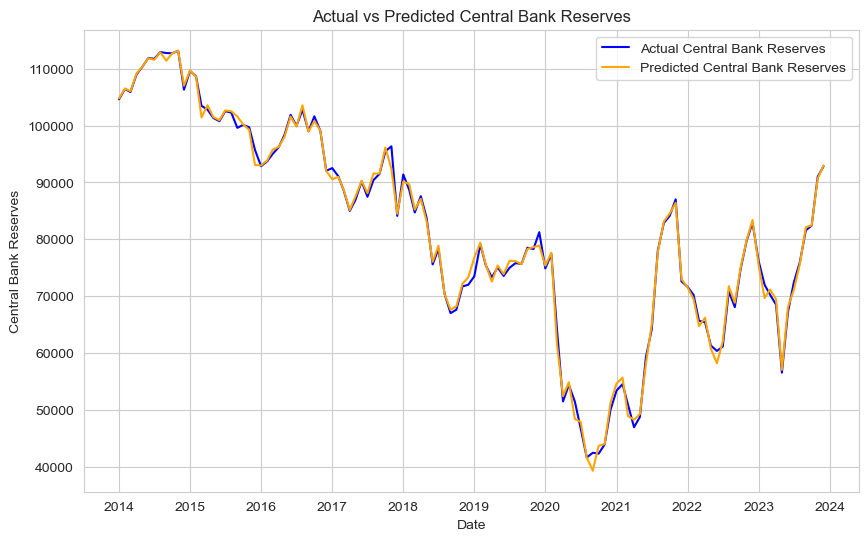

In [472]:
import matplotlib.pyplot as plt

# Generate predictions
predictions = model.predict()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(combined_df['YEAR-MONTH-DAY'], Y, label='Actual Central Bank Reserves', color='blue')
plt.plot(combined_df['YEAR-MONTH-DAY'], predictions, label='Predicted Central Bank Reserves', color='orange')
plt.title('Actual vs Predicted Central Bank Reserves')
plt.xlabel('Date')
plt.ylabel('Central Bank Reserves')
plt.legend()
plt.show()

Residuals have mean zero and but not like random noise like distribution. They partially obey normal distribution principle.

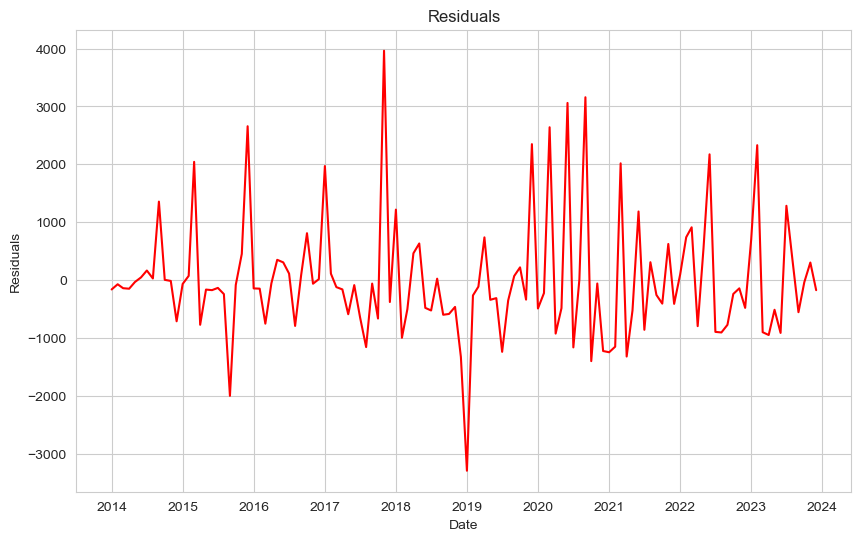

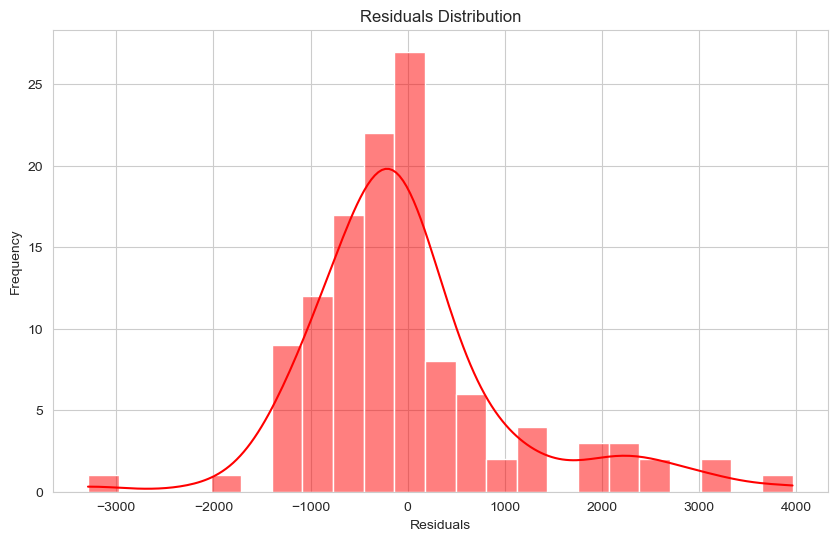

In [473]:
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(combined_df['YEAR-MONTH-DAY'], residuals, color='red')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Plot the residuals distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Conclusion

Regression Analysis:

Multiple linear regression analyses to investigate how various predictors influence outcomes like house prices, participation rates, and central bank reserves. 

House Prices: A model with a high R-squared value of 0.956 indicated that money supply and search volume for inflation significantly predict house prices.
Participation Rate: Another model showed a moderate explanation (R-squared = 0.502) of the variance in the participation rate, using predictors like search volumes for recession and pandemics.
Central Bank Reserves: A nearly perfect model fit (R-squared = 0.997) demonstrated that foreign investment significantly predicts central bank reserves, although some predictors did not show significant effects.

Detailed analysis for each model were made in related sections.

In this project ChatGPT and Copilot were used.
GPT was mainly used for explanation of model outcome and plotting puproses.

Example prompts for GPT: Creta a subplot for thse dataframes.
What is the meaning if Durbin watson test value. 